In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sympy as sp
import pyPI as pi

c:\Users\sbasa\Documents\GitHub\Polarimetric_Interferomerty\pyPI.py:50: RuntimeWarning: divide by zero encountered in divide
  vartheta = np.arctan(numerator/denominator)[0]
c:\Users\sbasa\Documents\GitHub\Polarimetric_Interferomerty\pyPI.py:59: RuntimeWarning: invalid value encountered in divide
  I_norm = ((I - I.min()) / (I.max() - I.min()) * 255).astype(np.uint8)
c:\Users\sbasa\Documents\GitHub\Polarimetric_Interferomerty\pyPI.py:59: RuntimeWarning: invalid value encountered in cast
  I_norm = ((I - I.min()) / (I.max() - I.min()) * 255).astype(np.uint8)


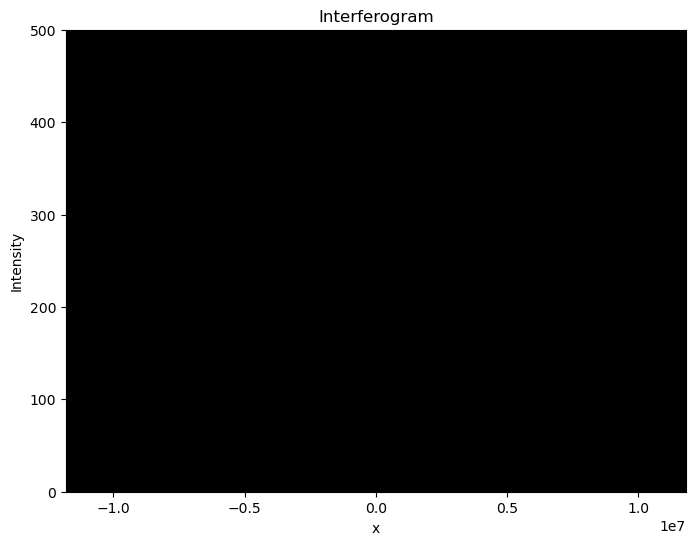

In [26]:
Er = np.array([[1], [1]])
Es = np.array([[1], [-1]])

info, i = pi.I(Er, Es, plot = True)

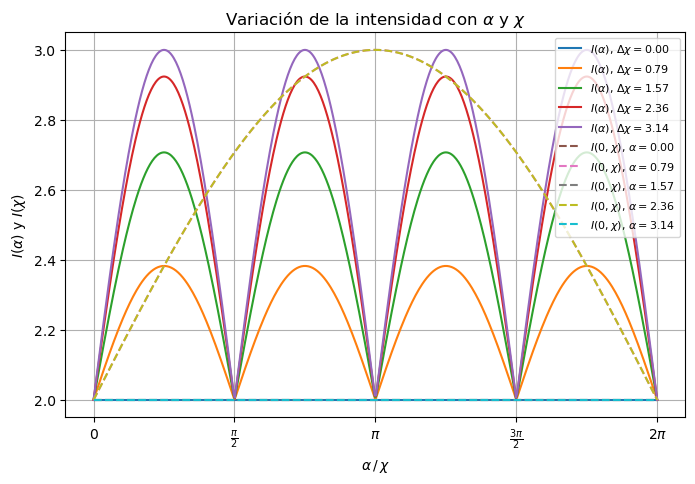

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros físicos
lambda_ = 532e-9  # Longitud de onda en metros
k = 2 * np.pi / lambda_  # Número de onda

# Definir la función de intensidad
def Intensity(alpha, kx, chi, mu=0):
    return (np.sqrt(2 - 2 * np.cos(chi) * np.cos(2*kx + mu)) * np.abs(np.sin(2*alpha)) / 2) + 2

# Rango de valores para alpha y chi
alpha_values = np.linspace(0, 2*np.pi, 500)
chi_values = np.linspace(0, 2*np.pi, 500)

# Crear la figura
plt.figure(figsize=(8, 5))

# Graficar la función para varios valores de α
for delta_chi in [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]:
    alpha = Intensity(alpha_values, 0, delta_chi)  # kx = 0 para graficar respecto a α
    plt.plot(alpha_values, alpha, label=rf"$I(\alpha)$, $\Delta \chi = {delta_chi:.2f}$")

# Graficar la función para varios valores de Δχ
for alpha_fixed in [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]:
    chi = Intensity(alpha_fixed, 0, chi_values)  # kx = 0 para graficar respecto a χ
    plt.plot(chi_values, chi, '--', label=rf"$I(0, \chi)$, $\alpha = {alpha_fixed:.2f}$")

# Definir los valores clave de alpha en el eje x
key_values = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
key_labels = [r"$0$", r"$\frac{\pi}{2}$", r"$\pi$", r"$\frac{3\pi}{2}$", r"$2\pi$"]
plt.xticks(key_values, key_labels)

plt.xlabel(r"$\alpha \, / \, \chi$")
plt.ylabel(r"$I(\alpha)$ y $I(\chi)$")
plt.title(r"Variación de la intensidad con $\alpha$ y $\chi$")
plt.legend(loc='upper right', fontsize=8)
plt.grid()
plt.show()


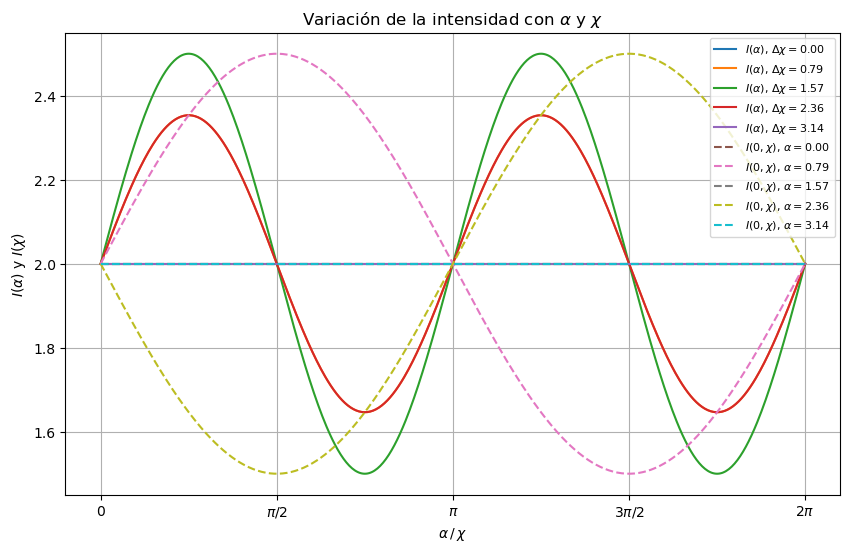

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parámetros físicos
lambda_ = 532e-9  # Longitud de onda en metros
k = 2 * np.pi / lambda_  # Número de onda

# Nueva función de intensidad
def Intensity(alpha, kx, chi, mu=0):
    term1 = 0.25 * np.exp(1j * (-1.0 * chi + 0.5 * np.pi)) * np.sin(2 * alpha)
    term2 = -0.125 * np.exp(1j * (-1.0 * chi + 0.5 * np.pi)) * np.sin(4 * alpha)
    term3 = 0.25 * np.exp(1j * (1.0 * chi - 0.5 * np.pi)) * np.sin(2 * alpha)
    term4 = -0.125 * np.exp(1j * (1.0 * chi - 0.5 * np.pi)) * np.sin(4 * alpha)
    term5 = -0.25 * np.exp(1j * (1.0 * chi + 0.5 * np.pi)) * np.sin(2 * alpha)
    term6 = -0.125 * np.exp(1j * (1.0 * chi + 0.5 * np.pi)) * np.sin(4 * alpha)
    term7 = 1
    term8 = -0.25 * np.exp(-1j * (1.0 * chi + 0.5 * np.pi)) * np.sin(2 * alpha)
    term9 = -0.125 * np.exp(-1j * (1.0 * chi + 0.5 * np.pi)) * np.sin(4 * alpha)

    intensity = 0.5 * np.abs(term1 + term2 + term3 + term4 + term5 + term6 + term7 + term8 + term9) * np.cos(2 * kx + mu) + 1.5
    return np.real(intensity)

# Rango de valores para alpha y chi
alpha_values = np.linspace(0, 2*np.pi, 500)
chi_values = np.linspace(0, 2*np.pi, 500)

# Crear la figura
plt.figure(figsize=(10, 6))

# Graficar la función para varios valores de Δχ
for delta_chi in [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]:
    alpha = Intensity(alpha_values, 0, delta_chi)  # kx = 0 para graficar respecto a α
    plt.plot(alpha_values, alpha, label=rf"$I(\alpha)$, $\Delta \chi = {delta_chi:.2f}$")

# Graficar la función para varios valores de α fijo
for alpha_fixed in [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]:
    chi = Intensity(alpha_fixed, 0, chi_values)  # kx = 0 para graficar respecto a χ
    plt.plot(chi_values, chi, '--', label=rf"$I(0, \chi)$, $\alpha = {alpha_fixed:.2f}$")

# Definir los valores clave de alpha en el eje x
key_values = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
key_labels = [r"$0$", r"$\pi/2$", r"$\pi$", r"$3\pi/2$", r"$2\pi$"]
plt.xticks(key_values, key_labels)

plt.xlabel(r"$\alpha \, / \, \chi$")
plt.ylabel(r"$I(\alpha)$ y $I(\chi)$")
plt.title(r"Variación de la intensidad con $\alpha$ y $\chi$")
plt.legend(loc='upper right', fontsize=8)
plt.grid(True)
plt.show()
